# ML CASE-STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

### Importing Libraries

In [1]:
import numpy as np # Numerical Python 
import pandas as pd # Python Data Analysis Library 
import matplotlib.pyplot as plt # Mathematical Plotting Library 
import seaborn as sns 
%matplotlib inline

=======

## Restaurant Reviews I Sentiment Analysis (NLP Case-study)

Dataset Source: https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv

### Importing & Inspecting Data

In [2]:
data = pd.read_csv('desktop/datasets/Restaurant_Reviews.tsv', sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Exploring Data

<AxesSubplot:xlabel='Liked', ylabel='count'>

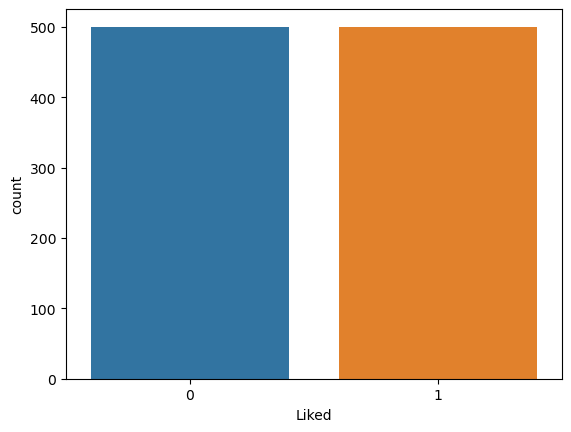

In [4]:
sns.countplot(x=data['Liked']) # Highly Balanced Data

### Pre-processing Data (NLTK Text Data Cleaning)

In [5]:
import nltk # Natural Language ToolKit

In [6]:
s = data['Review'][0]
s

'Wow... Loved this place.'

In [7]:
import re # Regular Expression
s = re.sub('[^a-zA-Z]', " ", s)
s

'Wow    Loved this place '

In [8]:
s = s.lower()
s

'wow    loved this place '

In [9]:
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [11]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
temp = []

for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['wow', 'loved', 'place']

In [13]:
s = " ".join(temp)
s

'wow loved place'

In [14]:
from nltk.stem import PorterStemmer # Natural Language Toolkit

In [15]:
ps = PorterStemmer()

In [16]:
s = ps.stem(s)
s

'wow loved plac'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer()

In [19]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [20]:
# Putting it aLL together

corpus = []

for i in range(len(data)):
    s = re.sub('[^a-zA-Z]', " ", data['Review'][i])
    s = s.lower()
    s = s.split()
    s = [word for word in s if word not in stopwords.words('english')]
    s = " ".join(s)
    s = ps.stem(s)
    corpus.append(s)
    
corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [21]:
cv = CountVectorizer()

In [22]:
cv.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
cv.fit_transform(corpus).toarray().shape # multidimensionality

(1000, 1994)

### Model Training & Building (Naive Baye)

In [45]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
Y = data['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=15)

In [36]:
from sklearn.naive_bayes import MultinomialNB # Naive Baye

In [37]:
clf = MultinomialNB()

In [38]:
clf.fit(X_train, Y_train)

MultinomialNB()

In [39]:
Y_pred =clf.predict(X_test)

In [42]:
X_train.shape

(670, 1994)

In [43]:
X_test.shape

(330, 1994)

### Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, classification_report

In [40]:
print(accuracy_score(Y_test, Y_pred))

0.7636363636363637


In [41]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       160
           1       0.77      0.76      0.77       170

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



========

## THANK YOU!